In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [2]:
class AgentState(TypedDict):
    number1: int
    operation: str
    number2: int
    finalNumber: int

In [3]:
def adder(state: AgentState) -> AgentState:
    """This node adds 2 numbers"""
    state['finalNumber'] = state['number1']+ state['number2']
    return state

def subtractor(state: AgentState) -> AgentState:
    """This node subtracts 2 numbers"""
    state['finalNumber'] = state['number1']-state['number2']
    return state

def router(state: AgentState):
    """Route"""
    if state['operation'] == "+":
        return 'additon'
    else:
        return "subtraction"


In [6]:
workflow = StateGraph(AgentState)

workflow.add_node('router', lambda state:state)
workflow.add_node('subtraction', subtractor)
workflow.add_node('additon', adder)
workflow.add_edge(START, "router")
workflow.add_conditional_edges(
    'router',
    router,
    {
        # Edge: Node
        "additon": "additon",
        "subtraction": "subtraction"
    }
    
)
workflow.add_edge('additon', END)
workflow.add_edge("subtraction", END)


app = workflow.compile()

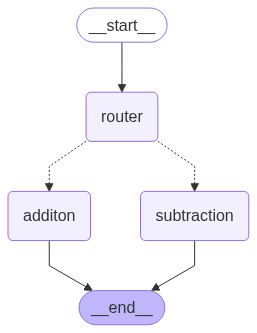

In [7]:
from IPython.display import Image
Image(app.get_graph().draw_mermaid_png())